### **Non Compliant Customer Conduct**

# Description

This job is one of my student cases based on data pack that have informations about a customers of a bank.

The objective here is map the conduct of non copliant customers

The main information of data shape is the column 'default' that define if customer is compliant, if default is equals '0' and non compliant if default is equals '1'.

# **Importing Packages and Reading the Data**

In [1]:
!pip install pandas
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#graphics Styles
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


**We will beginning understand the data structures and the importance of variable 'default', that are the our main variable to understand the customer behavior.**

In [4]:
df.shape

(10127, 16)

In [5]:
#amonth of compliant
df[df['default']==0].shape


(8500, 16)

In [6]:
#amonth of non compliant
df[df['default']==1].shape

(1627, 16)

In [28]:
# % of compliant and non compliant 
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default']==0].shape
qtd_inadimplentes, _ = df[df['default']==1].shape

print(f'number of compliant {round(100*qtd_adimplentes / qtd_total, 2)}%')
print(f'number od non compliant {round(100*qtd_inadimplentes / qtd_total, 2)}%')

number of compliant 84.28%
number od non compliant 15.72%


# **Handling Types and Non Values**

About data type 'object'.

As we can see, 'sexo' (genre), 'tipo_cartao' (card type), 'limite_credito' (card limit) and 'valor_transacoes_12m' (transaction value) are full complete.

but, 'escolaridade' (schooling), 'estado_civil' (marital status) and 'salario_anual' (annual salary) are no full compete.



In [8]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


About data type 'int64'.

As we can see, all of columns are full complete.

In [9]:
df.select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10127.0,7.391776e+08,3.690378e+07,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
default,10127.0,1.606596e-01,3.672348e-01,0.0,0.0,0.0,0.0,1.0
idade,10127.0,4.632596e+01,8.016814e+00,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203e+00,1.298908e+00,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,3.592841e+01,7.986416e+00,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580e+00,1.554408e+00,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317e+00,1.106225e+00,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167e+00,1.010622e+00,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,6.485869e+01,2.347257e+01,10.0,45.0,67.0,81.0,139.0


**Now, we will see the impact of missing data from 'escolaridade',(schooling) 'estado_civil'(marital status) and 'salario_anual' (annual salary).**

In [10]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentagem': round(100* qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)
  
  for stat in stats_dados_faltantes:
    print(stat)

Data representativeness for informations no full completed.

In [11]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


Now, the same vision, for compliant cases:

In [12]:
stats_dados_faltantes(df=df[df['default']==0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


For, non compliant cases:

In [13]:
stats_dados_faltantes(df=df[df['default']==1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


We have 2 keys columns that are fill with informations classifiel as 'object', are there 'limite_credito' and 'valor_transações_12m'. 

To best manager and compair this informations to undertand the custome behaivor, we need to change this value for 'float type'. 

In [14]:
#testing data types
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [15]:
#changing the data types
fn = lambda valor: float(valor.replace ('.', ''). replace(',', '.'))

valores_originais = ['12.691,51', '8.256,96', '3.418,56']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56']
[12691.51, 8256.96, 3418.56]


In [16]:
#appling the changes 
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

**Handling 'Non Values' data and understand your impacted**

In [17]:
#droping Non Values
df.dropna(inplace=True)

In [18]:
#comparing new data shape
df.shape

(7081, 16)

In [19]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default']==0].shape
qtd_inadimplentes_novo, _ = df[df['default']==1].shape

In [20]:
#comparing shape full data shape with handle data shape
print(f'total of compliant - full shape {round(100*qtd_adimplentes / qtd_total, 2)}%')
print(f'total of compliant - handle shape {round(100*qtd_adimplentes_novo / qtd_total_novo, 2)}%')
print(f'total of non compliant - full shape {round(100*qtd_inadimplentes / qtd_total, 2)}%')
print(f'total of non compliant - handle shape {round(100*qtd_inadimplentes_novo / qtd_total_novo, 2)}%')

total of compliant - full shape 83.93%
total of compliant - handle shape 84.28%
total of non compliant - full shape 16.07%
total of non compliant - handle shape 15.72%


***As we can see, the percentage of compliant and non compliant customers, chance below 1 percentual point, then we will follow the analyses using handle shape.*** 

In [21]:
#defining hadle shape as usual
df_adimplentes = df[df['default']==0]
df_inadimplentes = df[df['default']==1]

# **Graphics and Observation**

**Comparing 'escolaridade' (schooling) of customers compliant and non compliant.**

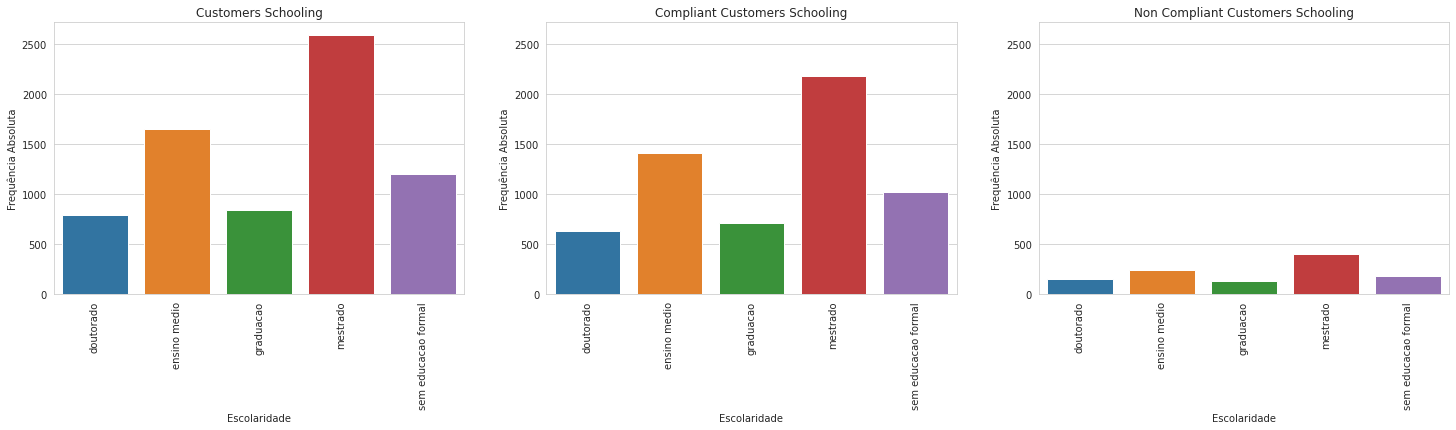

In [29]:
coluna = 'escolaridade'
titulos = ['Customers Schooling', 'Compliant Customers Schooling', 'Non Compliant Customers Schooling']

eixo = 0 
max_y = 0
max = df.select_dtypes ('object'). describe()[coluna]['freq'] * 1.1
 
figura, eixos = plt.subplots(1, 3, figsize= (25,5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

*These 3 graphics, show that the behavior of non compliant customers is the same as compliant customers. So the customers schooling is not a variable that help us to understanding non compliant customers behaivor.* 

**Comparing 'salario anual' (annual salary) with non compliant customers**

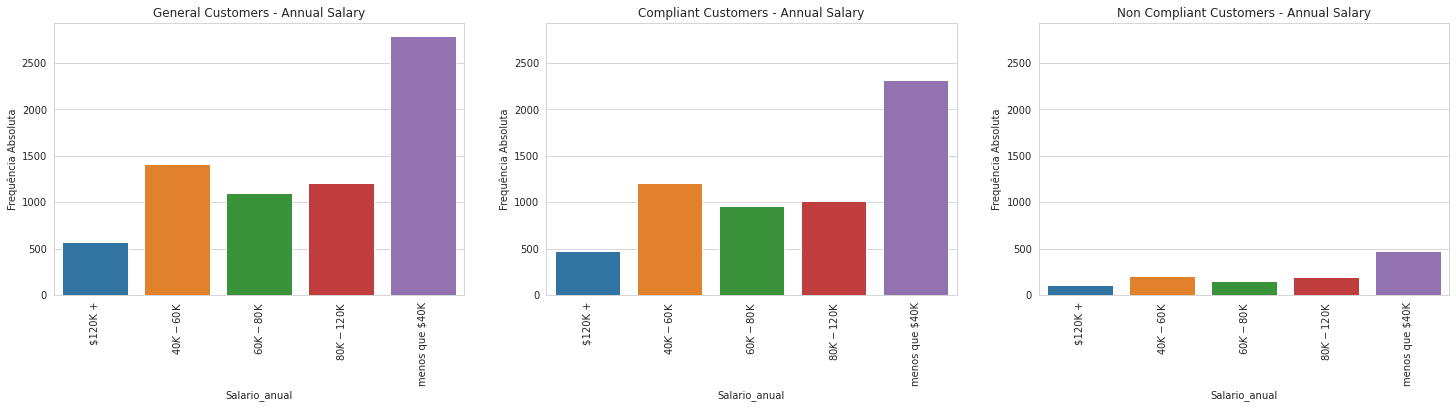

In [30]:
coluna = 'salario_anual'
titulos = ['General Customers - Annual Salary', 'Compliant Customers - Annual Salary', 'Non Compliant Customers - Annual Salary']

eixo = 0 
max_y = 0
max = df.select_dtypes ('object'). describe()[coluna]['freq'] * 1.1
 
figura, eixos = plt.subplots(1, 3, figsize= (25,5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

*We also can see, that the 3 graphics: General, compliant and non compliant customers has the same shape. So, annual payments is not a root causes for non compliant customers.*

**Relationship time**

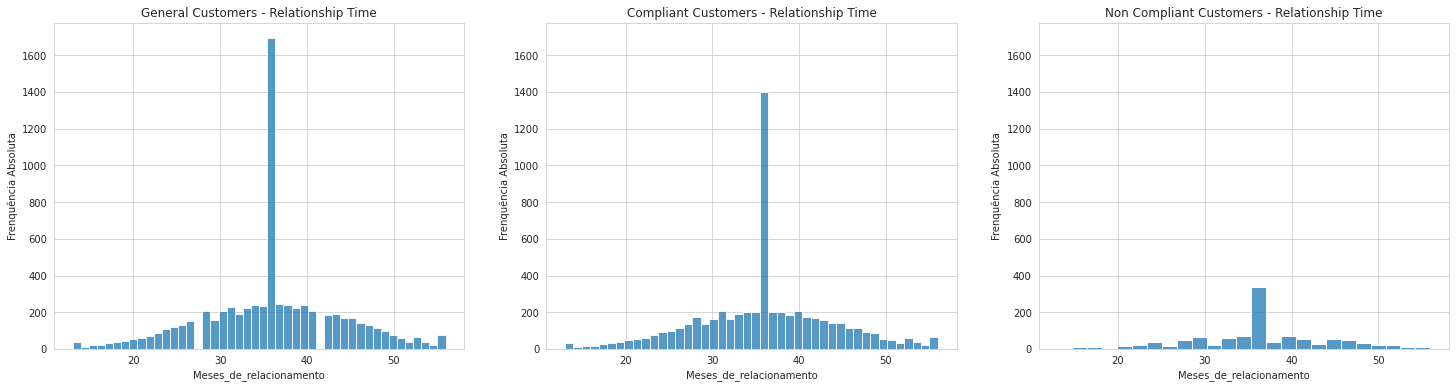

In [31]:
coluna = 'meses_de_relacionamento'
titulos = ['General Customers - Relationship Time', 'Compliant Customers - Relationship Time', 'Non Compliant Customers - Relationship Time']

eixo = 0 
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(25, 6), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frenquência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=[0, max_y])

  eixo += 1

figura.show()

*We can consider that relationship time is not a root cause for non compliant customers. The 3 graphics shape are the same, so we can relate nothing.*

**Amounts of Annual Transactions**

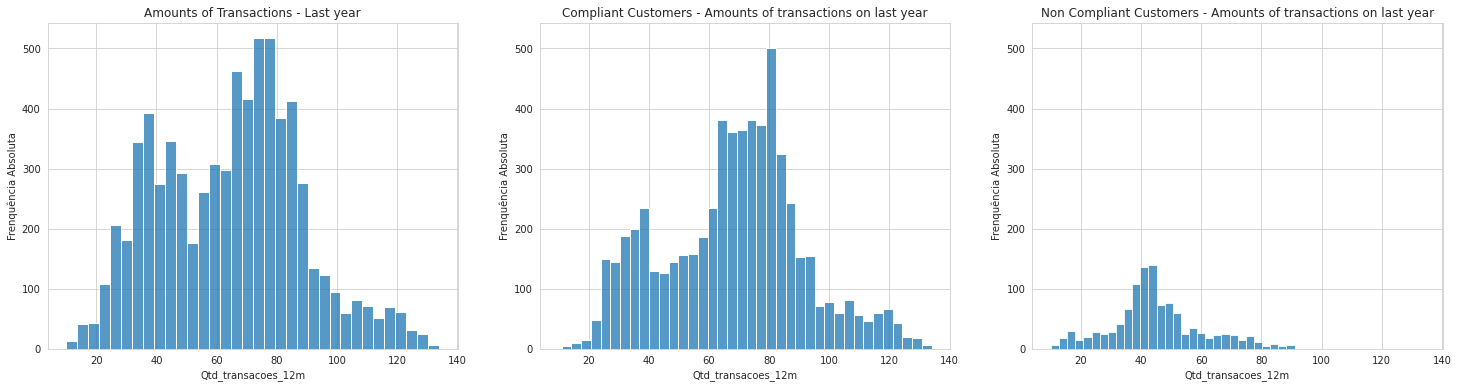

In [34]:
coluna = 'qtd_transacoes_12m'
titulos = ['Amounts of Transactions - Last year', 'Compliant Customers - Amounts of transactions on last year', 'Non Compliant Customers - Amounts of transactions on last year']

eixo = 0 
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(25, 6), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frenquência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=[0, max_y])

  eixo += 1

figura.show()

*Here, we start to meet a behaivor that could help us the understand root causes of non compliant customers.*

*If you see the amount of transations of the non compliant costumers, we have a high number between 30 and 50 transaction per year.*

*The graphics shapes is different when we see Compliant Customers. The high numbers are concentrate on betwwen 65 and 85 transaction per year.*



**Annual transaction Value**

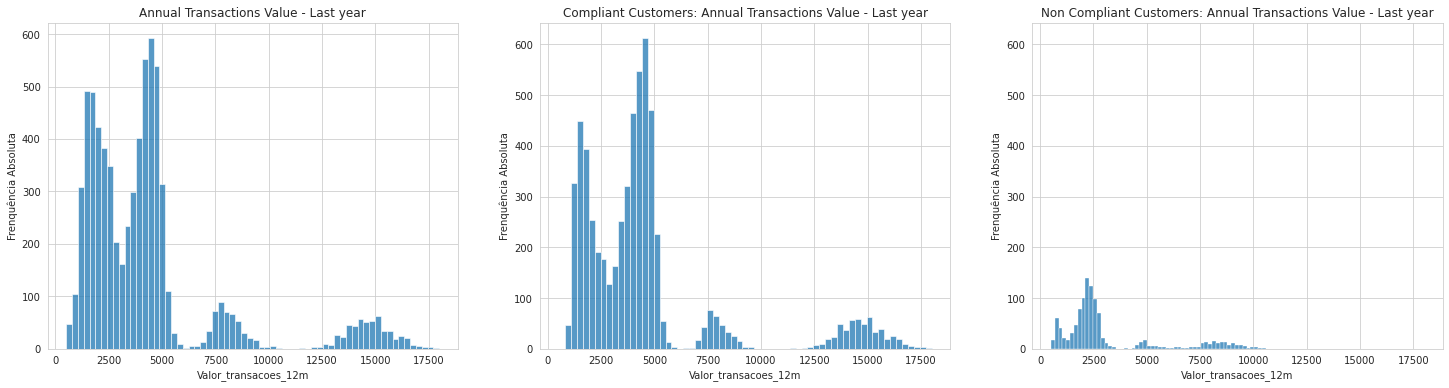

In [35]:
coluna = 'valor_transacoes_12m'
titulos = ['Annual Transactions Value - Last year', 'Compliant Customers: Annual Transactions Value - Last year', 'Non Compliant Customers: Annual Transactions Value - Last year']

eixo = 0 
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(25, 6), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frenquência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=[0, max_y])

  eixo += 1

figura.show()

*Here we also could see relevant informations.*

*We can see a high number of non compliant customer that had a annual trasation value between 2000 and 2700 reals.*

*this behaivor is different comparing with compliant customers, is clear that the high number of annual transation of this category is about 3000 reals.* 

# **Conclusion**

Considering all of analyses showed, we can not correlate 'escolaridade' (schooling), 'salarios anual' (Annual salary)  and 'tempo de relacionamento' (Relationship time) data to understand non compliant customer behavior.

But, when we analyses 'Amount of Annual Transaction' and 'Annual Transaction Value' data, is clear that non compliant customers have a different conduct.

To have a deep analysis we can cross the both data.

**Crossing Amount of Annual Transaction with Annual Transaction Value**

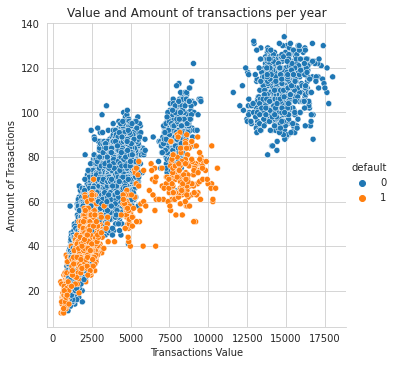

In [37]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
      title='Value and Amount of transactions per year',
      xlabel='Transactions Value',
      ylabel='Amount of Trasactions'
  )

Note! The 'orange points' are the non compliant customers and 'blue' are compliant customers.

Is clear that we have a type of customer that is more minded to be a non compliant customer.

We split the analysis by 4 categories:

1. Transactions amount less than 60 versus transaction Value less than 2700:
    * This public is prone to be a non compliant customer we can see that 65% of this public is non compliant.

2. More than 60 transaction and value between 2700 and 5000.
    * This is a good scenary for compliant customers, more then 85% of compliant customers

3. Transactions amount between 60 and 80 versus transaction Value between 7500 and 10000.
    * This public is also prone to be a non compliant customers, 80% of this public is non compliant customers.

4. More than 80 transaction and more than 7500 transaction Value.
    * This is more positive scenarios, we can a see big numbers of compliant customers 95%. 